In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

meat = pd.read_csv('Resources/meat_consumption.csv')
meat.head()

,Year,Beef_Veal,Lamb_Mutton,Pig,Chicken
0,1974,63,25,10,12
1,1975,67,22,10,13
2,1976,69,18,10,14
3,1977,67,18,11,15
4,1978,57,18,10,17


In [4]:
# Assign the data to X and y

y = meat[["Beef_Veal", "Lamb_Mutton", "Pig", "Chicken"]]
X = meat["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(44, 1) (44, 4)


In [5]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### END SOLUTION

In [6]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [7]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8722828581511864
Testing Score: 0.7920644480527732


Text(0.5, 1.0, 'Residual Plot')

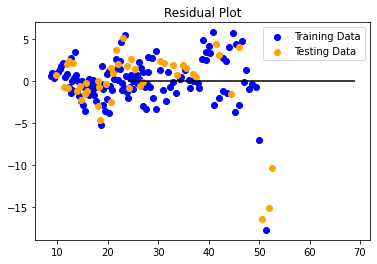

In [8]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [16]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-0.65656178]
 [-0.36032233]
 [ 0.37413661]
 [ 0.82828089]]
y-axis intercept:  [ 1348.66902719   735.412184    -726.57504826 -1623.71330147]


In [17]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1974]]
Max X Value: [[2017]]


In [24]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict([[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025],[2026],[2027]])
### END SOLUTION
y_max

array([[23.72735412,  8.28171585, 28.43262634, 47.75753506],
       [23.07079234,  7.92139352, 28.80676295, 48.58581595],
       [22.41423056,  7.56107119, 29.18089956, 49.41409684],
       [21.75766878,  7.20074885, 29.55503616, 50.24237773],
       [21.101107  ,  6.84042652, 29.92917277, 51.07065862],
       [20.44454522,  6.48010419, 30.30330938, 51.89893951],
       [19.78798344,  6.11978186, 30.67744599, 52.7272204 ],
       [19.13142166,  5.75945952, 31.05158259, 53.55550129],
       [18.47485988,  5.39913719, 31.4257192 , 54.38378218],
       [17.8182981 ,  5.03881486, 31.79985581, 55.21206307]])